In [ ]:
import importlib

# library_name = "nome_da_biblioteca"  # Substitua 'nome_da_biblioteca' pelo nome da biblioteca que deseja verificar

# try:
#     importlib.import_module(library_name)
#     print(f'A biblioteca {library_name} está instalada.')
# except ImportError:
#     print(f'A biblioteca {library_name} não está instalada.')

In [16]:
import importlib

# Ler o arquivo requirements.txt
with open('requirements.txt', 'r') as file:
    libraries = file.read().splitlines()

# Verificar se as bibliotecas estão instaladas
missing_libraries = []
for library in libraries:
    try:
        importlib.import_module(library)
    except ImportError:
        missing_libraries.append(library)

if missing_libraries:
    print("As seguintes bibliotecas não estão instaladas:")
    for library in missing_libraries:
        print(library)
else:
    print("Todas as bibliotecas do requirements.txt estão instaladas.")


Todas as bibliotecas do requirements.txt estão instaladas.


In [1]:
# pip install pandas numpy

                                              0.0/10.6 MB ? eta -:--:--
     --                                       0.5/10.6 MB 11.1 MB/s eta 0:00:01
     ----                                     1.1/10.6 MB 11.5 MB/s eta 0:00:01
     ------                                   1.6/10.6 MB 11.4 MB/s eta 0:00:01
     --------                                 2.2/10.6 MB 11.5 MB/s eta 0:00:01
     ----------                               2.7/10.6 MB 11.6 MB/s eta 0:00:01
     ------------                             3.3/10.6 MB 11.6 MB/s eta 0:00:01
     --------------                           3.8/10.6 MB 11.6 MB/s eta 0:00:01
     ----------------                         4.4/10.6 MB 11.7 MB/s eta 0:00:01
     ------------------                       4.9/10.6 MB 11.6 MB/s eta 0:00:01
     --------------------                     5.5/10.6 MB 11.7 MB/s eta 0:00:01
     ----------------------                   6.0/10.6 MB 11.6 MB/s eta 0:00:01
     ------------------------                 6.


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

# Passo 1: Coleta de Dados (supondo que você já tem os arquivos CSV)

# Ler os arquivos CSV em DataFrames
df_produtos = pd.read_csv('produtos.csv')
print('\ndf_produtos\n',df_produtos.head())
df_clientes = pd.read_csv('clientes.csv')
print('\ndf_clientes\n',df_clientes.head())
df_compras = pd.read_csv('compras.csv')
print('\ndf_compras\n',df_compras.head())

# Passo 2: Limpeza de Dados

# Remover a compra fictícia para o cliente inexistente
df_compras = df_compras[df_compras['ID do Cliente'] != 'Cliente-Inexistente']

# Verificar dados faltantes (NaN) e tratar, se necessário
df_compras.fillna(0, inplace=True)  # Preencher dados faltantes com 0

# Passo 3: Organização de Dados

# Juntar os DataFrames para criar um conjunto de dados completo
df = df_compras.merge(df_produtos, on='ID do Produto')
df = df.merge(df_clientes, on='ID do Cliente')

# Agora você tem um único DataFrame contendo todos os dados organizados

# Visualizar os primeiros registros para verificar o resultado
print('\ndf_unificado\n',df.head())
df.to_csv('dataframe_unificado.csv',index=False)



df_produtos
   ID do Produto Nome do Produto   Preço
0     Produto-1       Produto 1  811.91
1     Produto-2       Produto 2  227.94
2     Produto-3       Produto 3  704.10
3     Produto-4       Produto 4  306.08
4     Produto-5       Produto 5  355.81

df_clientes
   ID do Cliente Nome do Cliente  Idade    Gênero
0     Cliente-1       Cliente 1     45  Feminino
1     Cliente-2       Cliente 2     61  Feminino
2     Cliente-3       Cliente 3     37     Outro
3     Cliente-4       Cliente 4     60  Feminino
4     Cliente-5       Cliente 5     41     Outro

df_compras
    ID da Compra ID do Cliente ID do Produto Data da Compra  Valor da Compra
0             1   Cliente-319    Produto-34      2023-6-24            84.06
1             2   Cliente-398    Produto-86       2023-5-9            71.62
2             3    Cliente-58    Produto-43      2023-1-10            50.91
3             4   Cliente-380     Produto-1       2023-2-2           428.29
4             5   Cliente-468    Produto-94  

In [3]:
# pip install pandas matplotlib seaborn

                                              0.0/7.6 MB ? eta -:--:--
     --                                       0.4/7.6 MB 12.6 MB/s eta 0:00:01
     ----                                     0.9/7.6 MB 11.9 MB/s eta 0:00:01
     -------                                  1.5/7.6 MB 11.7 MB/s eta 0:00:01
     ----------                               2.0/7.6 MB 11.6 MB/s eta 0:00:01
     -------------                            2.6/7.6 MB 11.7 MB/s eta 0:00:01
     ----------------                         3.1/7.6 MB 11.7 MB/s eta 0:00:01
     -------------------                      3.7/7.6 MB 11.7 MB/s eta 0:00:01
     ---------------------                    4.1/7.6 MB 11.5 MB/s eta 0:00:01
     ------------------------                 4.6/7.6 MB 11.4 MB/s eta 0:00:01
     ---------------------------              5.3/7.6 MB 11.6 MB/s eta 0:00:01
     ------------------------------           5.8/7.6 MB 11.6 MB/s eta 0:00:01
     ---------------------------------        6.3/7.6 MB 11.


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


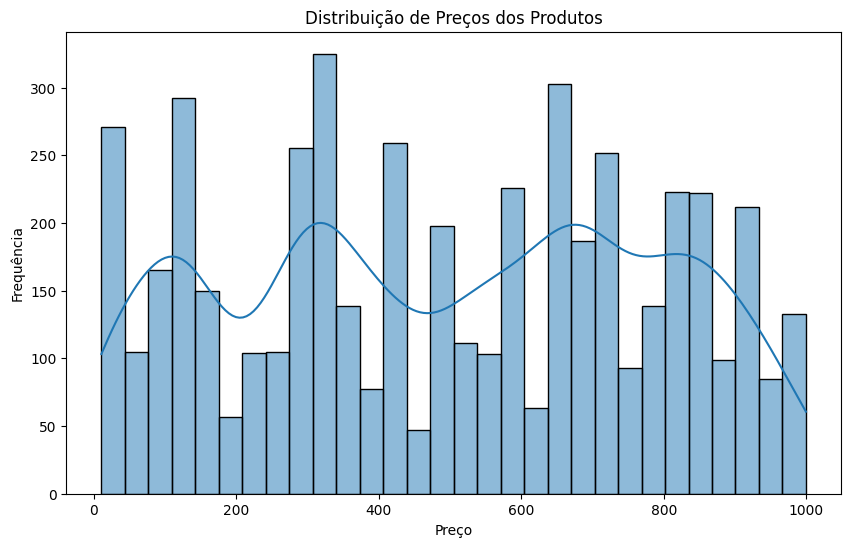

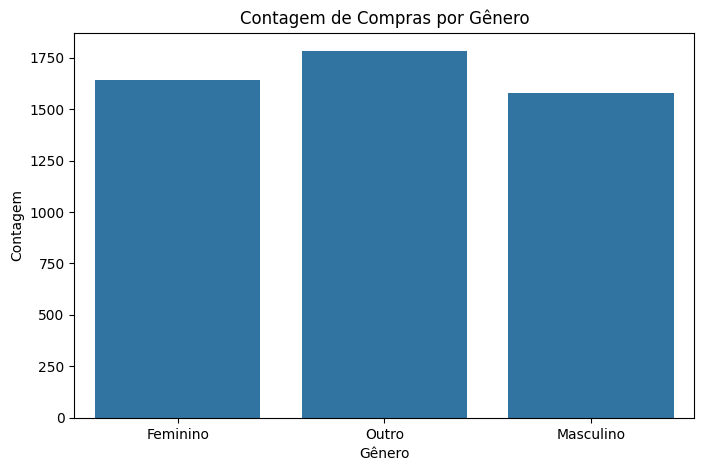

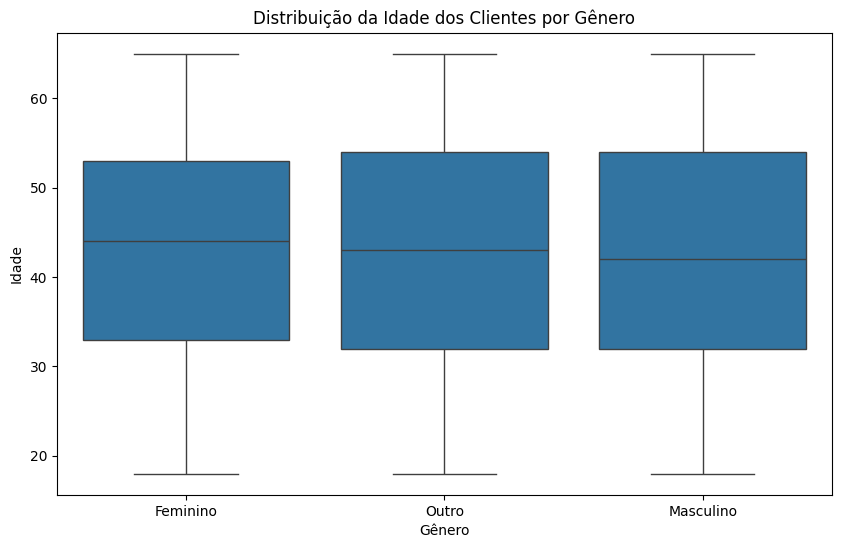

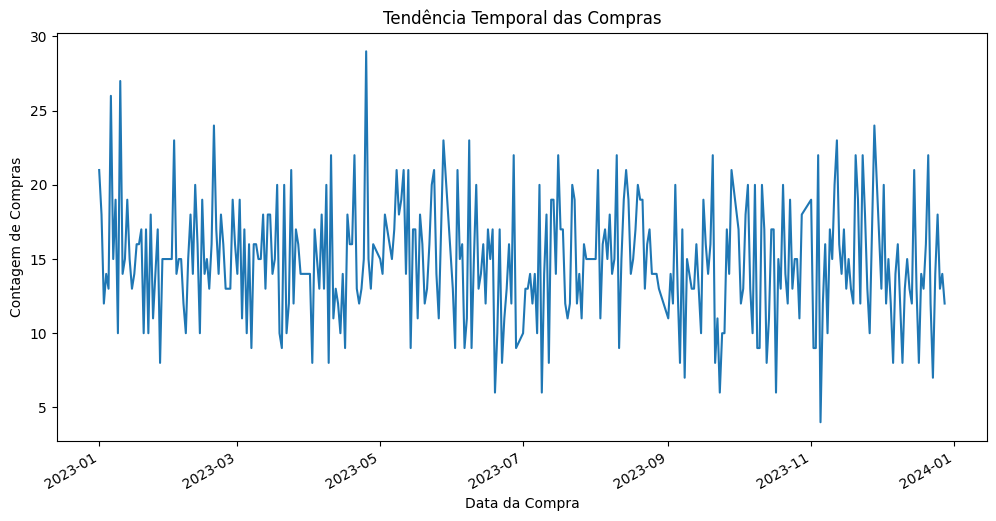

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Resumo Estatístico
# Vamos calcular estatísticas resumidas dos dados

# Estatísticas de compras
estatisticas_compras = df['Valor da Compra'].describe()

# Estatísticas de idade dos clientes
estatisticas_idade = df['Idade'].describe()

# Passo 2: Visualização de Dados
# Vamos criar algumas visualizações para entender melhor os dados

# Histograma dos preços dos produtos
plt.figure(figsize=(10, 6))
sns.histplot(df['Preço'], bins=30, kde=True)
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()
print('\n')

# Gráfico de barras da contagem de compras por gênero
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gênero')
plt.title('Contagem de Compras por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()
print('\n')

# Passo 3: Segmentação de Clientes
# Você pode segmentar clientes com base em diferentes critérios. Vamos analisar a segmentação por gênero e idade como exemplo.

# Box plot da idade dos clientes por gênero
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gênero', y='Idade')
plt.title('Distribuição da Idade dos Clientes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()
print('\n')

# Passo 4: Análise de Tendências Temporais
# Se houver dados de data, podemos analisar tendências temporais.

# Converter a coluna de data para datetime
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'])

# Gráfico de linha da contagem de compras ao longo do tempo
plt.figure(figsize=(12, 6))
df['Data da Compra'].value_counts().plot()
plt.title('Tendência Temporal das Compras')
plt.xlabel('Data da Compra')
plt.ylabel('Contagem de Compras')
plt.show()


In [5]:
print(df.head())

   ID da Compra ID do Cliente ID do Produto Data da Compra  Valor da Compra  \
0             1   Cliente-319    Produto-34     2023-06-24            84.06   
1          4436   Cliente-319    Produto-54     2023-12-04           231.91   
2          1001   Cliente-319     Produto-2     2023-09-14           366.19   
3           453   Cliente-319    Produto-24     2023-08-22           342.43   
4           433   Cliente-319    Produto-35     2023-08-12            93.89   

  Nome do Produto   Preço Nome do Cliente  Idade    Gênero  
0      Produto 34  733.20     Cliente 319     39  Feminino  
1      Produto 54  415.86     Cliente 319     39  Feminino  
2       Produto 2  227.94     Cliente 319     39  Feminino  
3      Produto 24   11.03     Cliente 319     39  Feminino  
4      Produto 35   56.09     Cliente 319     39  Feminino  


In [7]:

# pip install pandas plotly dash


                                              0.0/15.6 MB ? eta -:--:--
     -                                        0.4/15.6 MB 8.9 MB/s eta 0:00:02
     --                                       1.0/15.6 MB 10.3 MB/s eta 0:00:02
     ---                                      1.5/15.6 MB 10.6 MB/s eta 0:00:02
     -----                                    2.0/15.6 MB 10.8 MB/s eta 0:00:02
     ------                                   2.6/15.6 MB 10.9 MB/s eta 0:00:02
     -------                                  3.1/15.6 MB 10.9 MB/s eta 0:00:02
     ---------                                3.6/15.6 MB 11.5 MB/s eta 0:00:02
     ----------                               4.2/15.6 MB 11.6 MB/s eta 0:00:01
     ------------                             4.7/15.6 MB 11.5 MB/s eta 0:00:01
     -------------                            5.3/15.6 MB 11.6 MB/s eta 0:00:01
     --------------                           5.8/15.6 MB 11.6 MB/s eta 0:00:01
     ----------------                         6.


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Ler os dados de compras e clientes
df_compras = pd.read_csv('compras.csv')
df_clientes = pd.read_csv('clientes.csv')

# Juntar os DataFrames para ter a informação de gênero
df_merge = df_compras.merge(df_clientes, on='ID do Cliente')

# Inicializar o aplicativo Dash
app = dash.Dash(__name__)

# Opções do filtro
gender_options = [
    {'label': 'Masculino', 'value': 'Masculino'},
    {'label': 'Feminino', 'value': 'Feminino'},
    {'label': 'Outro', 'value': 'Outro'}
]

# Definir o layout do aplicativo
app.layout = html.Div([
    html.H1("Dashboard de Análise de Dados",style={'color':'white'}),

    # Exemplo de gráfico interativo (scatter plot)
    dcc.Graph(id='compras-por-genero'),

    # Exemplo de filtro (dropdown para selecionar o gênero)
    dcc.Dropdown(
        id='gender-dropdown',
        options=[
            {'label': 'Masculino', 'value': 'Masculino'},
            {'label': 'Feminino', 'value': 'Feminino'},
            {'label': 'Outro', 'value': 'Outro'},
            {'label': 'Todos', 'value': 'Todos'}

        ],
        value='Masculino'
    )
])

# Callback para atualizar o gráfico
@app.callback(
    Output('compras-por-genero', 'figure'),
    Input('gender-dropdown', 'value')
)
def update_figure(selected_gender):
    # Filtrar os dados com base na seleção do gênero
    if selected_gender == 'Todos':
        filtered_df = df_merge  # Mostrar todos os gêneros
    else:
        filtered_df = df_merge[df_merge['Gênero'] == selected_gender]

    # Calcular o número de compras por gênero
    data = filtered_df.groupby('Gênero')['ID da Compra'].count().reset_index()
    
    # Criar o gráfico de barras
    fig = px.bar(data, x='Gênero', y='ID da Compra', title=f'Número de Compras por Gênero: {selected_gender}.')
    # Personalizar o rótulo do eixo Y
    fig.update_yaxes(title_text='Número de Compras')
    
    return fig
if __name__ == '__main__':
    app.run_server(debug=True)
